In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plost

In [2]:
data = pd.read_csv('VN_housing_dataset_preprocessing.csv', index_col=0)
data

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Giá
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4.0,5.0,46.0,NaN,NaN,"86,96 triệu/m²",8.696000e+10
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không rõ,NaN,3.0,37.0,NaN,NaN,"116,22 triệu/m²",1.162200e+11
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4.0,4.0,40.0,10.00,4.0,65 triệu/m²,6.500000e+10
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6.0,51.0,12.75,4.0,100 triệu/m²,1.000000e+11
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Không rõ,NaN,4.0,36.0,9.00,4.0,"86,11 triệu/m²",8.611000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82490,2019-08-26,"Đường Lê Đức Thọ, Phường Mỹ Đình 1, Quận Nam T...",Quận Nam Từ Liêm,Phường Mỹ Đình 1,Nhà phố liền kề,Đã có sổ,NaN,3.0,38.0,NaN,NaN,"76,32 triệu/m²",7.632000e+10
82491,2019-08-23,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,Không rõ,NaN,3.0,38.0,NaN,NaN,"81,58 triệu/m²",8.158000e+10
82492,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Không rõ,NaN,3.0,50.0,NaN,NaN,292 triệu/m²,2.920000e+11
82493,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4.0,41.0,NaN,NaN,"341,46 triệu/m²",3.414600e+11


In [7]:
data.dtypes

Ngày                object
Địa chỉ             object
Quận                object
Huyện               object
Loại hình nhà ở     object
Giấy tờ pháp lý     object
Số tầng            float64
Số phòng ngủ       float64
Diện tích          float64
Dài                float64
Rộng               float64
Giá/m2              object
Giá                float64
dtype: object

In [14]:
data['Ngày'] = pd.to_datetime(data['Ngày'])

<AxesSubplot:xlabel='Ngày'>

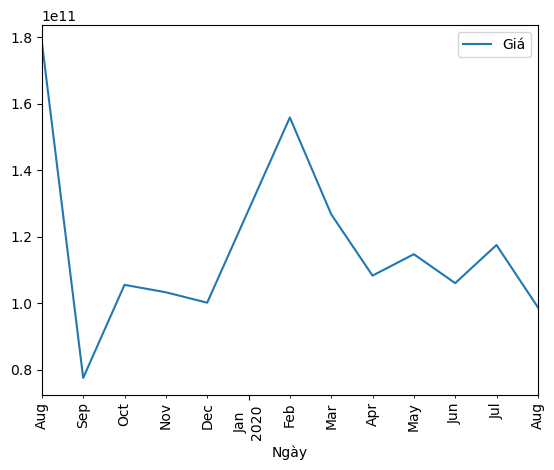

In [38]:
data_monthly = data.groupby(data['Ngày'].dt.to_period('M'))['Giá'].mean().reset_index()
data_monthly.plot(x='Ngày', y='Giá', kind='line', rot=90)

In [42]:
import folium
import pandas as pd

# Tạo một bản đồ trống với tọa độ trung tâm là Hà Nội
map_hanoi = folium.Map(location=[21.0285, 105.8542], zoom_start=11)

# # Tạo marker cho từng quận và đặt màu sắc theo giá nhà trung bình
# for index, row in data.iterrows():
#     district = row['Quận']
#     price = row['Giá']

#     # Chọn màu sắc dựa trên giá nhà trung bình
#     color = 'red' if price > 1000000000 else 'green'

#     # Tạo marker và thêm vào bản đồ
#     folium.Marker(
#         location=[row['Latitude'], row['Longitude']],
#         popup=district,
#         icon=folium.Icon(color=color)
#     ).add_to(map_hanoi)

# Hiển thị bản đồ
map_hanoi